In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
# import some data to play with
df = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\Fraud_check.csv")
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [4]:
label_encoder = preprocessing.LabelEncoder()
df["Undergrad"] = label_encoder.fit_transform(df["Undergrad"])
df["Marital.Status"] = label_encoder.fit_transform(df["Marital.Status"])
df["Urban"] = label_encoder.fit_transform(df["Urban"])

In [5]:
x=df.iloc[:,0:5]
y=df["Urban"]

In [6]:
x

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  
0                 10  
1                 18  
2                 30  
3                 15  
4                 28  
..               ...  
595                7  
596                2  
597                0  
598               17  
599               16  

[600 rows x 5 columns]

In [7]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [8]:
df.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [9]:
colnames=list(df.columns)

In [10]:
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [12]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

# Building Decision Tree and random forest

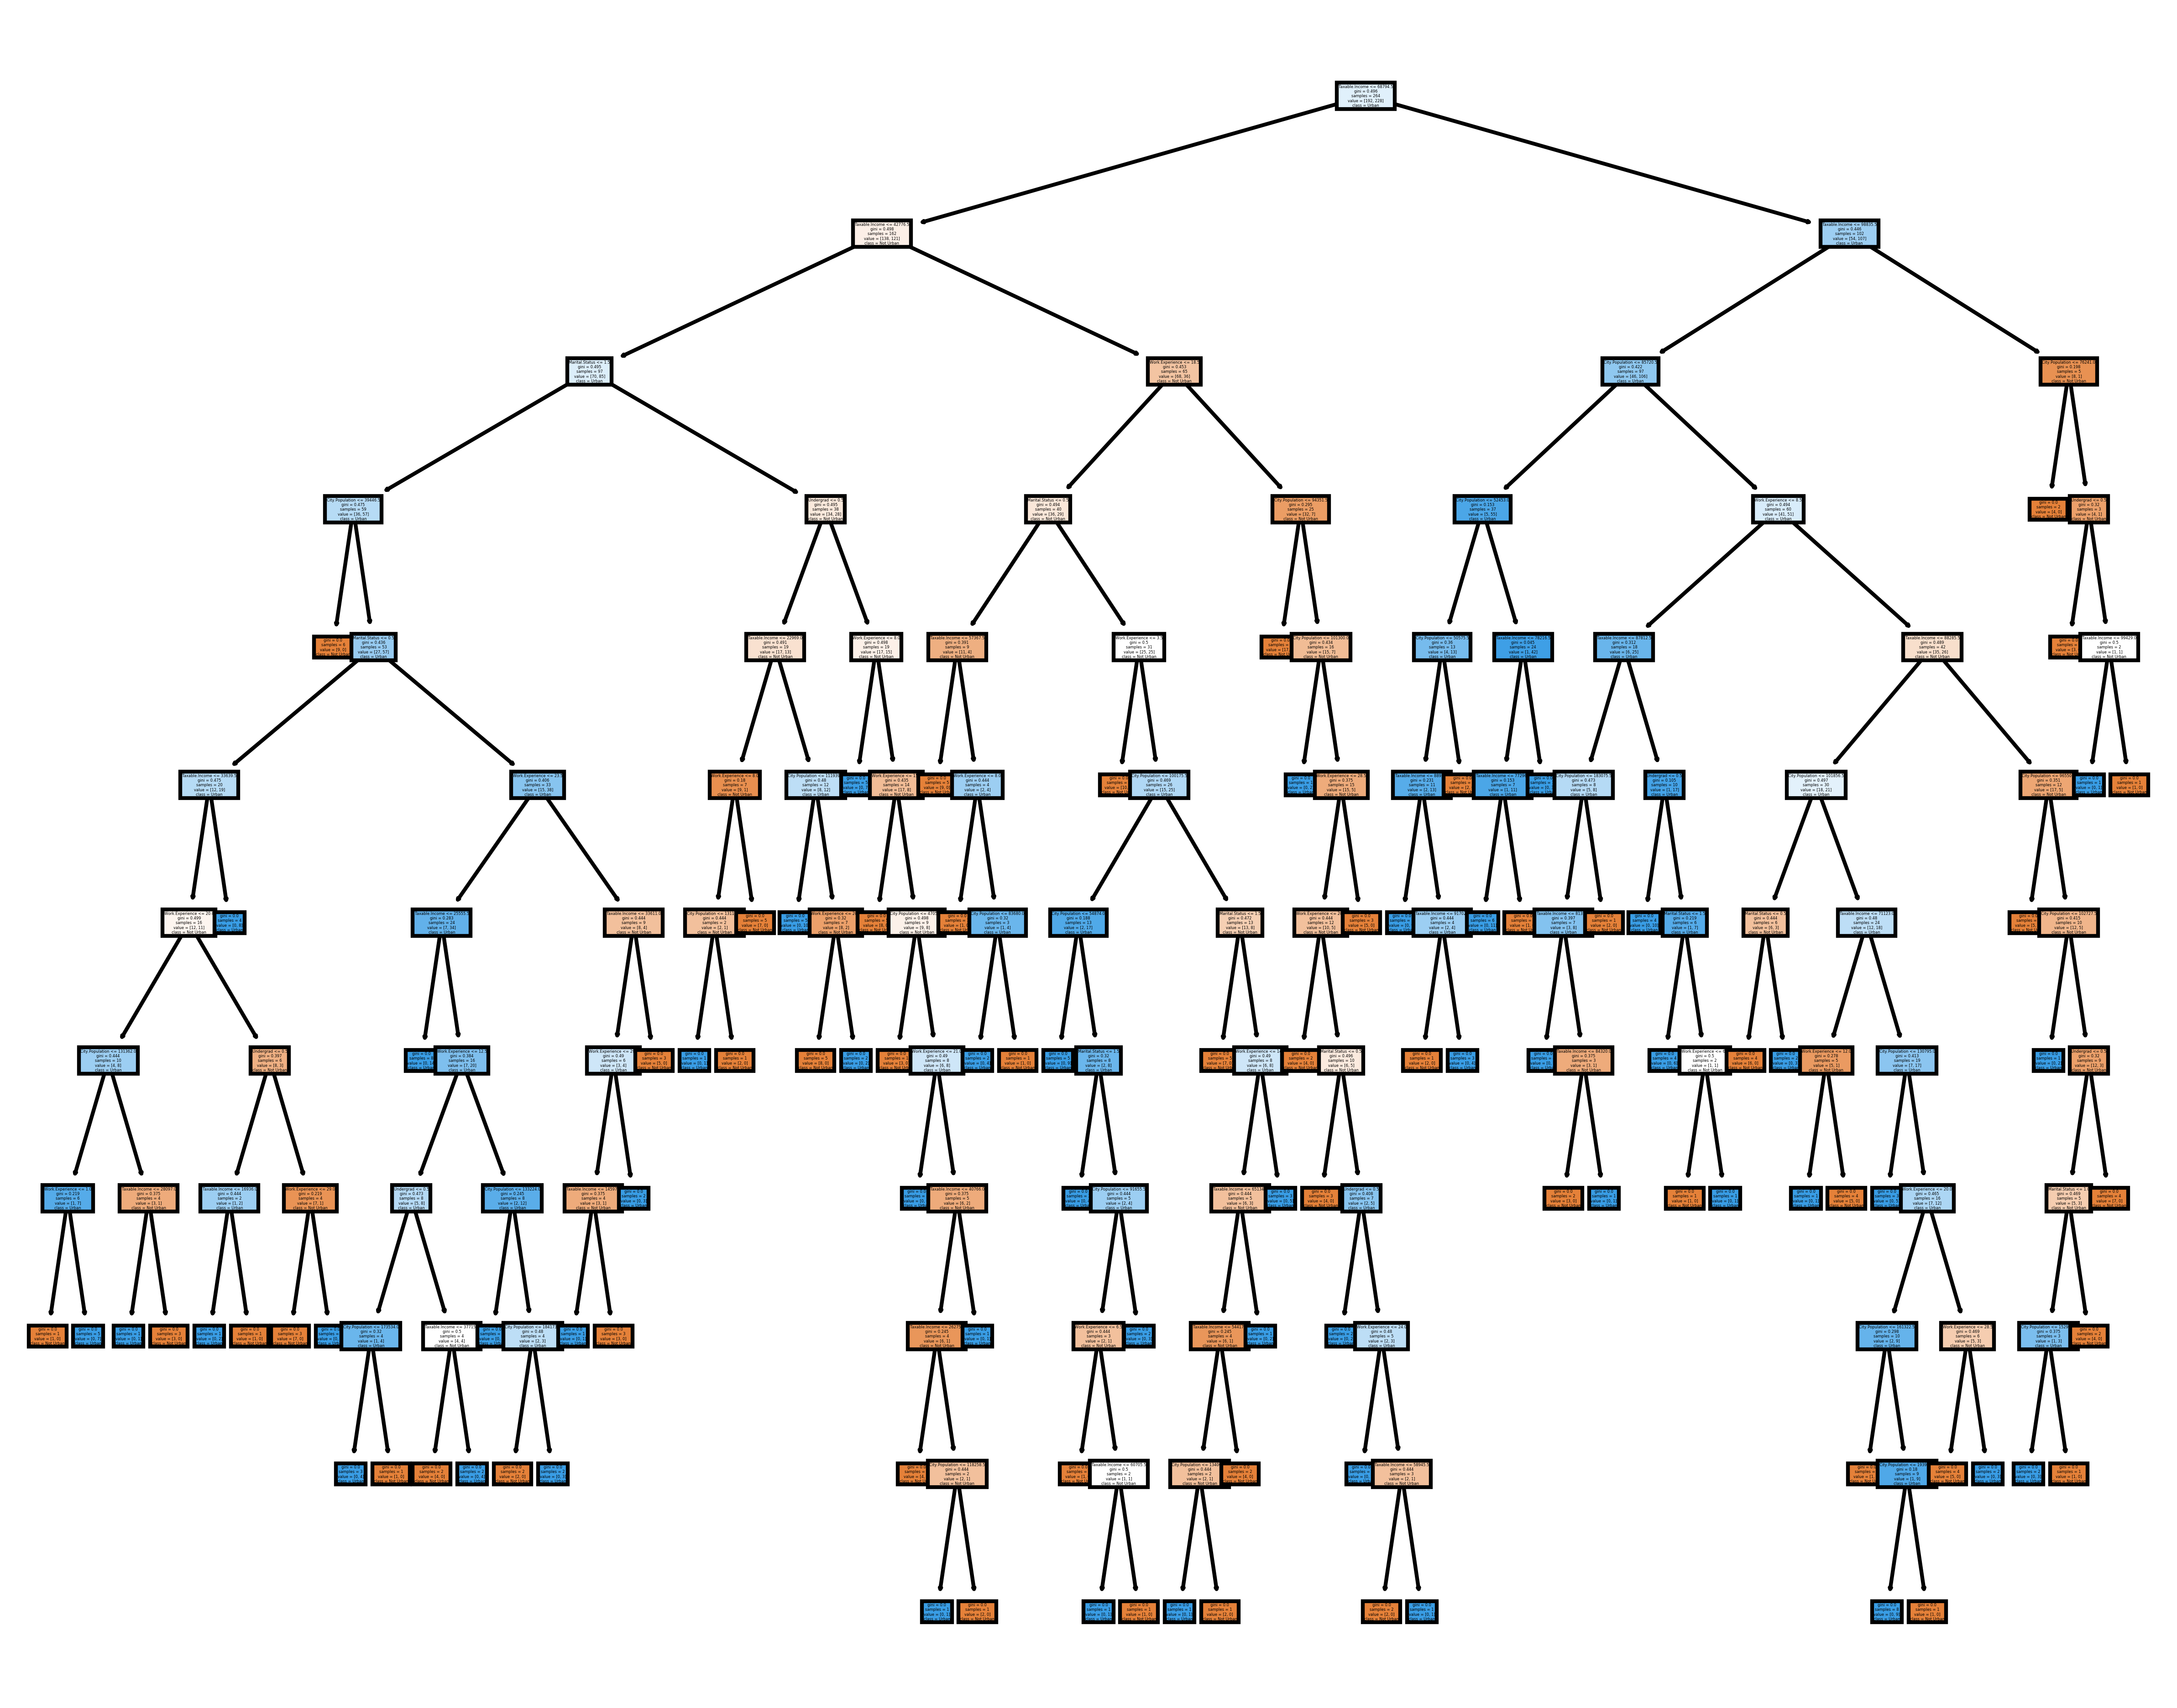

In [13]:
fn=[ 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience']
cn=['Not Urban','Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=600)
tree.plot_tree(rf.estimators_[0],feature_names = fn, class_names=cn,filled = True);

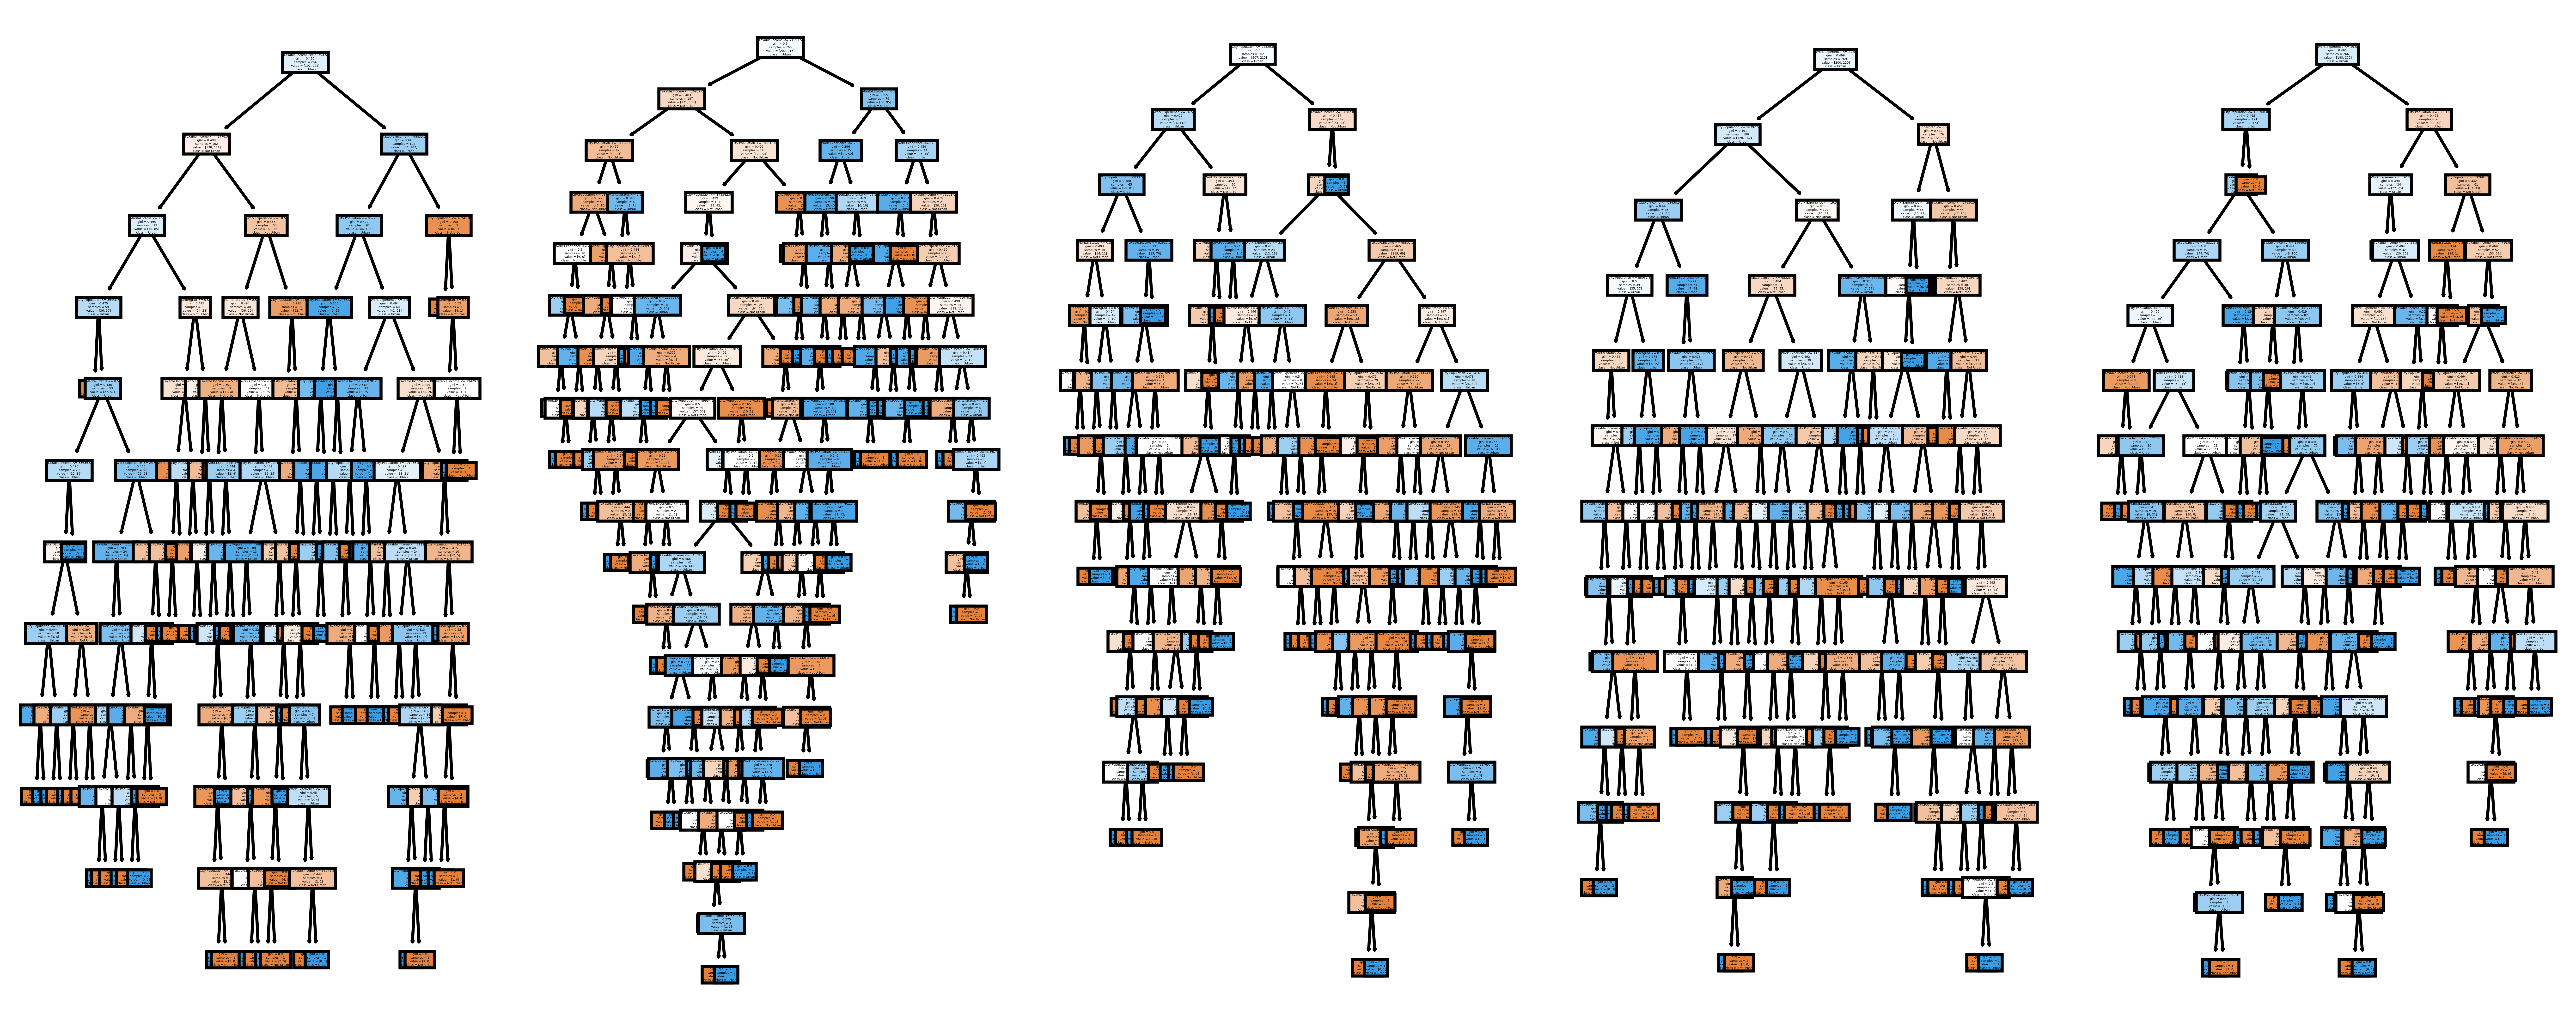

In [14]:
# This may not the best way to view each estimator as it is small
fn=[ 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience']
cn=['Not Urban','Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (15,6), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);


In [15]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
x=df.iloc[:,0:5]
y=df["Urban"]

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(rf.estimators_[0], x, y, cv=kfold)
print(results.mean())

0.555


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Ensembling techniques ( Bagging, Boosting and Stacking)

In [16]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

x=df.iloc[:,0:5]
y=df["Urban"]

seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(rf.estimators_[0], x, y, cv=kfold)
print(results.mean())

0.555


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [17]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

x=df.iloc[:,0:5]
y=df["Urban"]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(rf.estimators_[0], x, y, cv=kfold)
print(results.mean())

0.555


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [18]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

x=df.iloc[:,0:5]
y=df["Urban"]
kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.505
